# Prédiction de la faillite des entreprises

## Introduction

Ce projet vise à analyser et prédire la faillite des entreprises en utilisant un ensemble de données contenant divers indicateurs financiers. Nous utiliserons des techniques de nettoyage des données, d'analyse exploratoire et de modélisation pour identifier les facteurs de risque et construire un modèle de classification.

## Importation et nettoyage des données 

Dans un premier temps nous allons importer les bibliothèques nécessaires ainsi que les données.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Company_Bankruptcy_Prediction.csv')

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.shape

(6819, 96)

Le jeu de données comporte 6819 observations et 96 colonnes.

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [7]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [8]:
data.select_dtypes('number')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [11]:
len(data.select_dtypes(include='number').columns)

96

Une particularité de ce jeu de données est qu'il ne comporte que des variables quantitatives, il y a aucune variables qualitatives.

In [9]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

La variable à expliquer comporte environ 3 % de banques ayant fait faillite, ce qui représente un ratio plutôt faible.

## Interprétation des données 

Nous allons à présent faire une description de chaques variables. 

- Y - Bankrupt?: Class label
- X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
- X2- ROA(A) before interest and % after tax: Return On Total Assets(A)
- X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
- X4 - Operating Gross Margin: Gross Profit/Net Sales
- X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
- X6 - Operating Profit Rate: Operating Income/Net Sales
- X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
- X8 - After-tax net Interest Rate: Net Income/Net Sales
- X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
- X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
- X11 - Operating Expense Rate: Operating Expenses/Net Sales
- X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
- X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
- X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
- X15 - Tax rate (A): Effective Tax Rate
- X16 - Net Value Per Share (B): Book Value Per Share(B)
- X17 - Net Value Per Share (A): Book Value Per Share(A)
- X18 - Net Value Per Share (C): Book Value Per Share(C)
- X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
- X20 - Cash Flow Per Share
- X21 - Revenue Per Share (Yuan ¥): Sales Per Share
- X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
- X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
- X24 - Realized Sales Gross Profit Growth Rate
- X25 - Operating Profit Growth Rate: Operating Income Growth
- X26 - After-tax Net Profit Growth Rate: Net Income Growth
- X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
- X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
- X29 - Total Asset Growth Rate: Total Asset Growth
- X30 - Net Value Growth Rate: Total Equity Growth
- X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
- X32 - Cash Reinvestment %: Cash Reinvestment Ratio
- X33 - Current Ratio
- X34 - Quick Ratio: Acid Test
- X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
- X36 - Total debt/Total net worth: Total Liability/Equity Ratio
- X37 - Debt ratio %: Liability/Total Assets
- X38 - Net worth/Assets: Equity/Total Assets
- X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
- X40 - Borrowing dependency: Cost of Interest-bearing Debt
- X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
- X42 - Operating profit/Paid-in capital: Operating Income/Capital
- X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
- X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
- X45 - Total Asset Turnover
- X46 - Accounts Receivable Turnover
- X47 - Average Collection Days: Days Receivable Outstanding
- X48 - Inventory Turnover Rate (times)
- X49 - Fixed Assets Turnover Frequency
- X50 - Net Worth Turnover Rate (times): Equity Turnover
- X51 - Revenue per person: Sales Per Employee
- X52 - Operating profit per person: Operation Income Per Employee
- X53 - Allocation rate per person: Fixed Assets Per Employee
- X54 - Working Capital to Total Assets
- X55 - Quick Assets/Total Assets
- X56 - Current Assets/Total Assets
- X57 - Cash/Total Assets
- X58 - Quick Assets/Current Liability
- X59 - Cash/Current Liability
- X60 - Current Liability to Assets
- X61 - Operating Funds to Liability
- X62 - Inventory/Working Capital
- X63 - Inventory/Current Liability
- X64 - Current Liabilities/Liability
- X65 - Working Capital/Equity
- X66 - Current Liabilities/Equity
- X67 - Long-term Liability to Current Assets
- X68 - Retained Earnings to Total Assets
- X69 - Total income/Total expense
- X70 - Total expense/Assets
- X71 - Current Asset Turnover Rate: Current Assets to Sales
- X72 - Quick Asset Turnover Rate: Quick Assets to Sales
- X73 - Working capitcal Turnover Rate: Working Capital to Sales
- X74 - Cash Turnover Rate: Cash to Sales
- X75 - Cash Flow to Sales
- X76 - Fixed Assets to Assets
- X77 - Current Liability to Liability
- X78 - Current Liability to Equity
- X79 - Equity to Long-term Liability
- X80 - Cash Flow to Total Assets
- X81 - Cash Flow to Liability
- X82 - CFO to Assets
- X83 - Cash Flow to Equity
- X84 - Current Liability to Current Assets
- X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
- X86 - Net Income to Total Assets
- X87 - Total assets to GNP price
- X88 - No-credit Interval
- X89 - Gross Profit to Sales
- X90 - Net Income to Stockholder's Equity
- X91 - Liability to Equity
- X92 - Degree of Financial Leverage (DFL)
- X93 - Interest Coverage Ratio (Interest expense to EBIT)
- X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
- X95 - Equity to Liability

In [10]:
data.isnull().sum().sum()

0

Il y a aucune valeur manquante.

In [13]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

On remarque que de nombreuses variables ont été normalisé, au total 72 d'entres elles. Le problème c'est que pour effectuer nos tests, cela va être difficile de les faire sur des variables normalisées. Nous allons donc passer de 96 variables à plus que 24 variables.

In [16]:
data.columns = data.columns.str.strip()

# data.columns.str : Cela permet d'appliquer des méthodes de chaînes de caractères (comme .strip(), .lower(), .replace(), etc.)
# directement sur tous les noms de colonnes.

# str.strip() : Cette méthode supprime tous les espaces au début et à la fin de chaque chaîne de caractères.

In [17]:
data.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

Cette commande sert juste à mieux présenter nos variables. 

In [18]:
variables = data.columns
non_standard = []


for var in variables:
    if data[var].max() != 1:
        non_standard.append(var)

print(len(non_standard))        
print(non_standard)

24
['Operating Expense Rate', 'Research and development expense rate', 'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio', 'Total debt/Total net worth', 'Accounts Receivable Turnover', 'Average Collection Days', 'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency', 'Revenue per person', 'Allocation rate per person', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Inventory/Current Liability', 'Long-term Liability to Current Assets', 'Current Asset Turnover Rate', 'Quick Asset Turnover Rate', 'Cash Turnover Rate', 'Fixed Assets to Assets', 'Total assets to GNP price']


In [19]:
standard = []

for var in variables:
    if data[var].max() == 1:
        standard.append(var)

print(len(standard))        
print(standard)

72
['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Cash flow rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %', 'Interest Expense Ratio', 'Debt ratio %', 'Net worth/Assets', 'Long-term fund suitability r

Il y a bien 72 variables normalisées et 24 variables non-normalisées. 

# Interprétation graphique 

Avant d'effectuer les tests afin de déterminer quelles variables sont significatives, nous allons d'abord créer des graphiques pour visualiser la distribution de nos données.

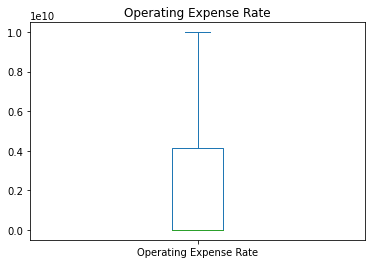

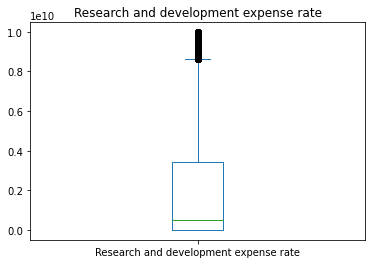

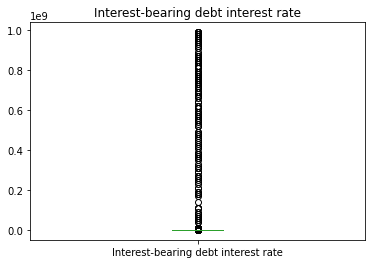

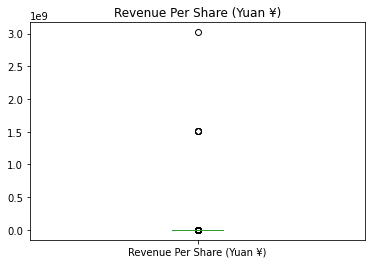

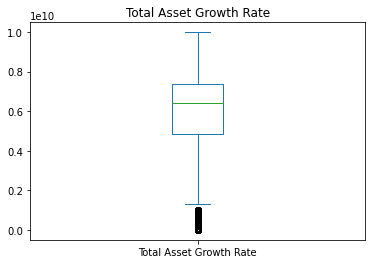

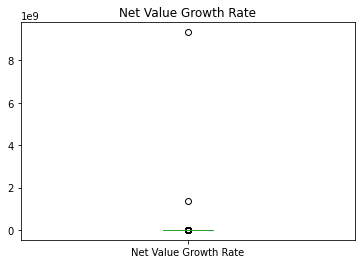

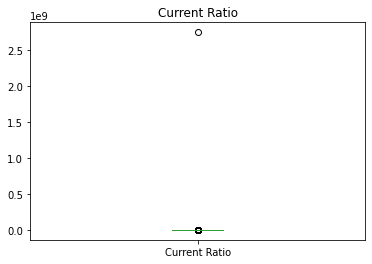

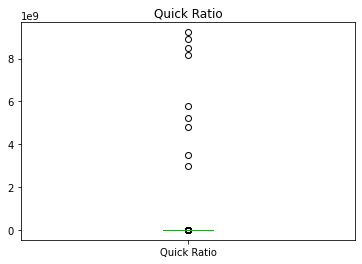

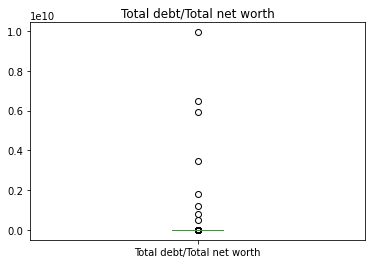

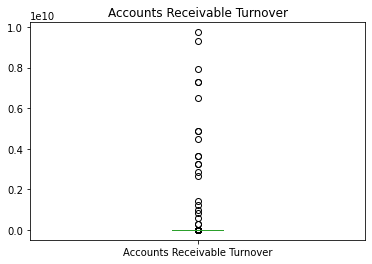

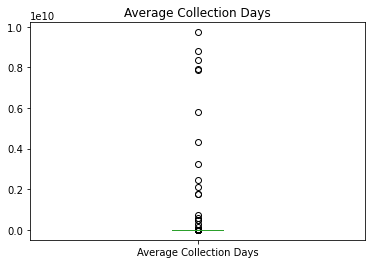

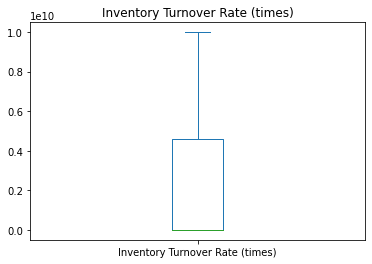

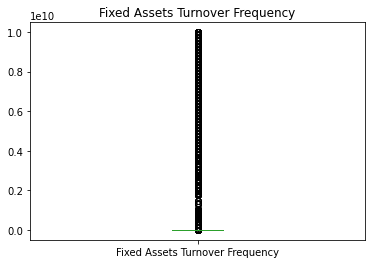

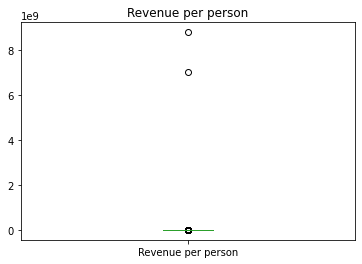

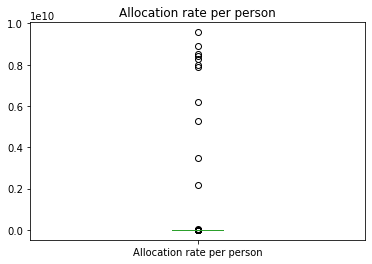

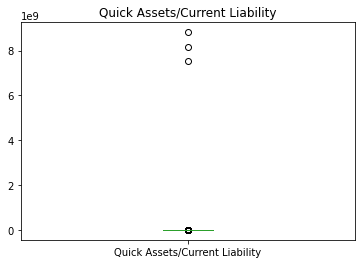

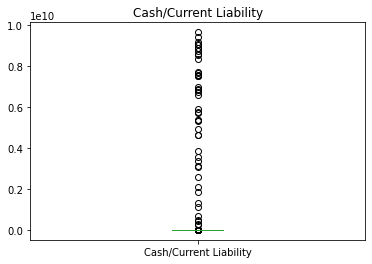

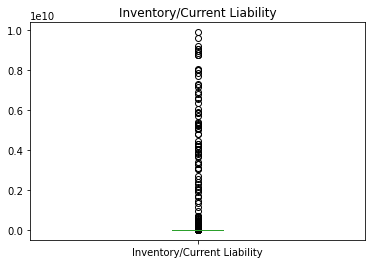

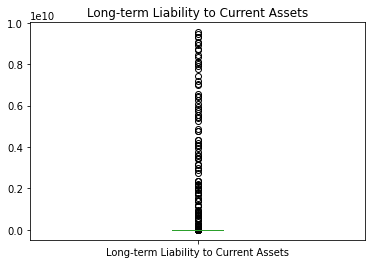

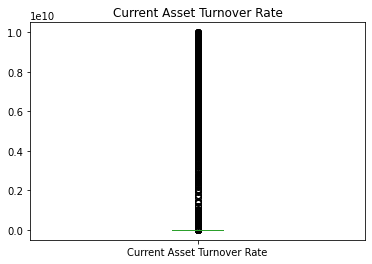

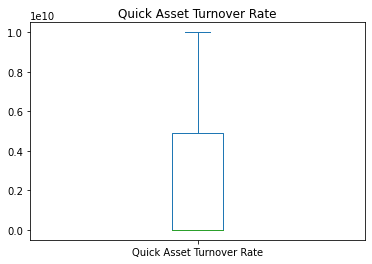

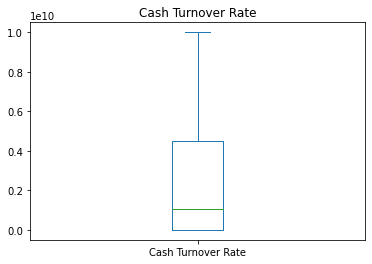

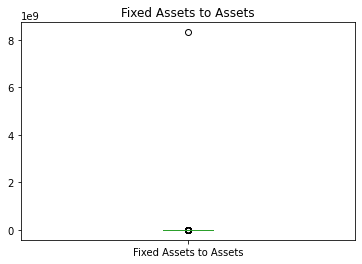

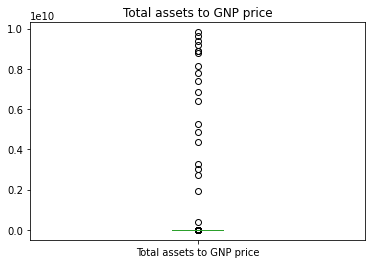

In [20]:
for var in non_standard:
    data[var].plot(kind='box')
    plt.title(var)
    plt.show()

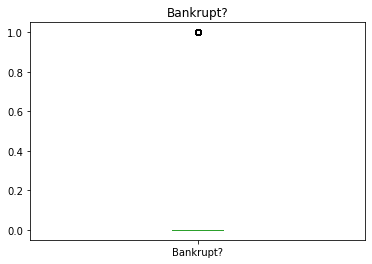

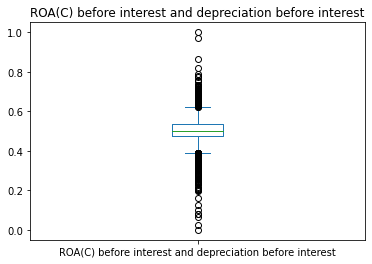

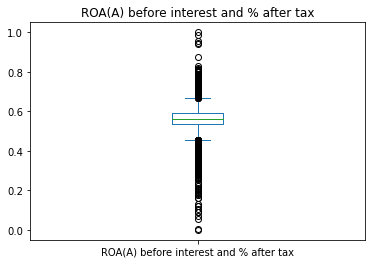

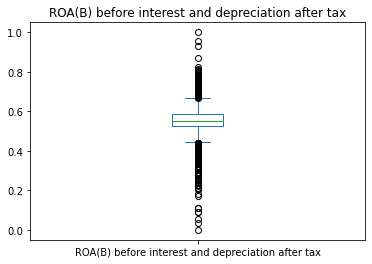

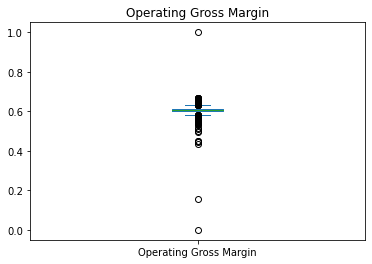

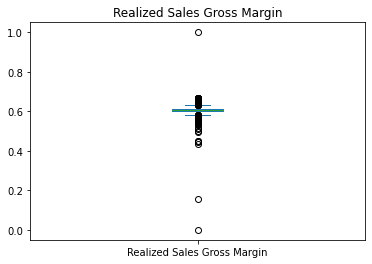

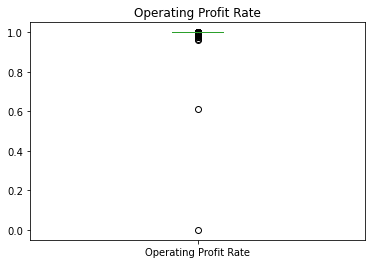

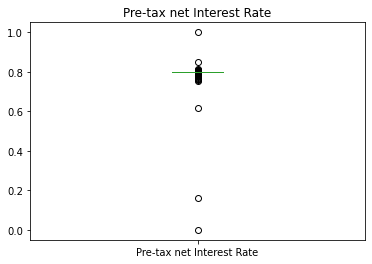

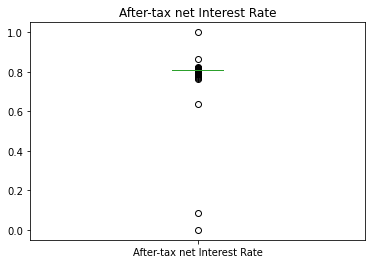

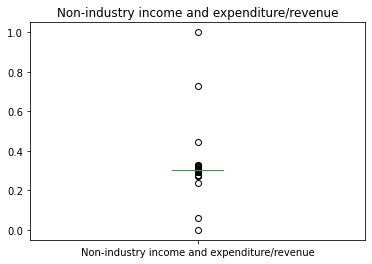

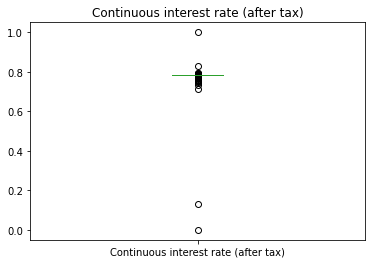

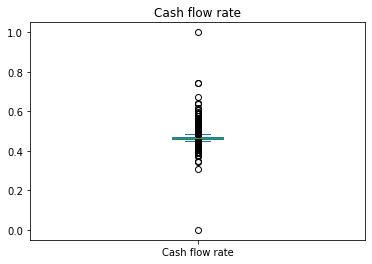

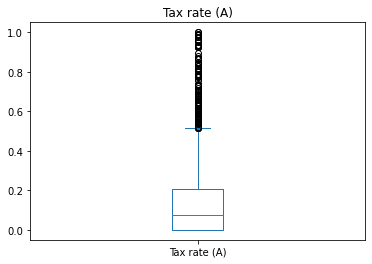

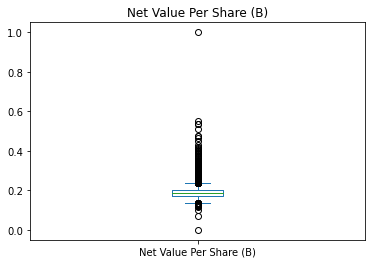

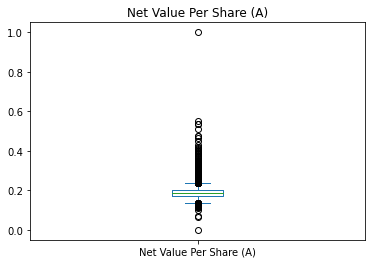

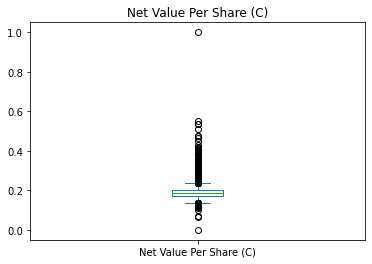

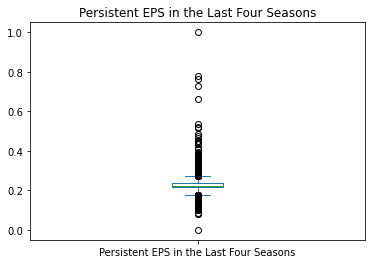

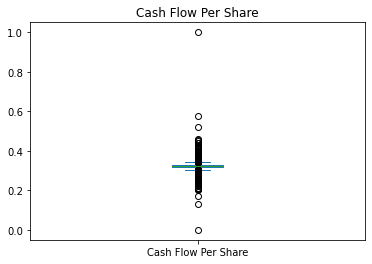

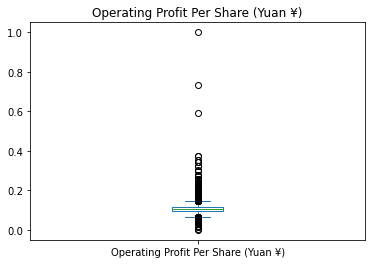

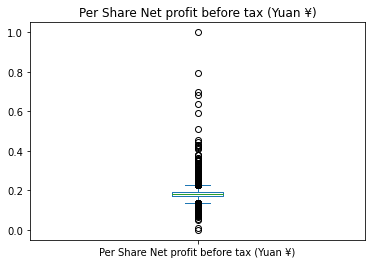

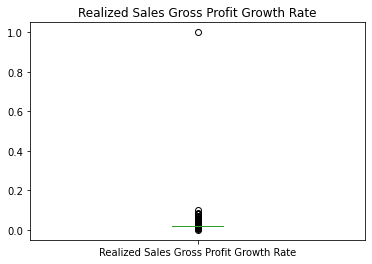

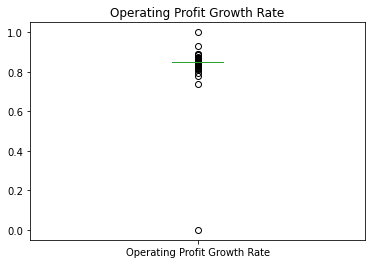

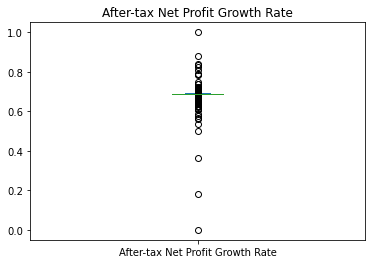

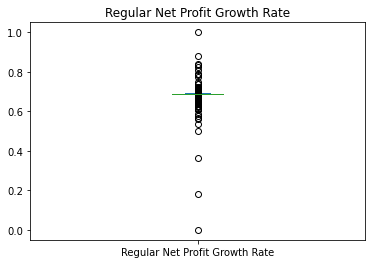

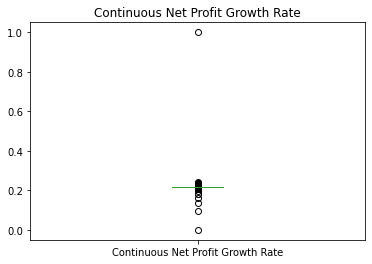

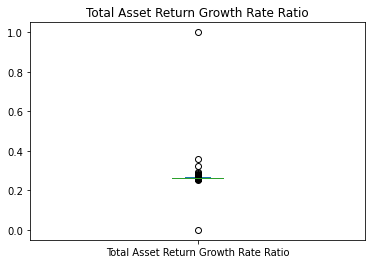

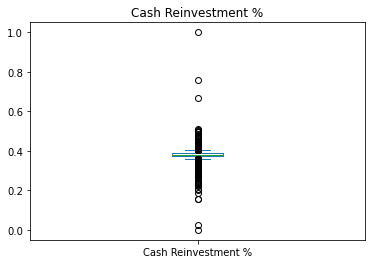

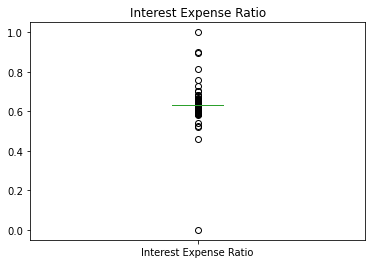

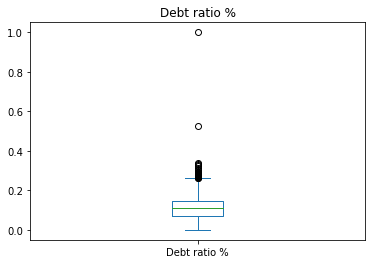

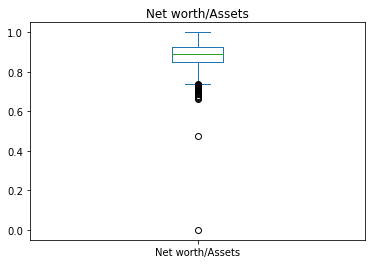

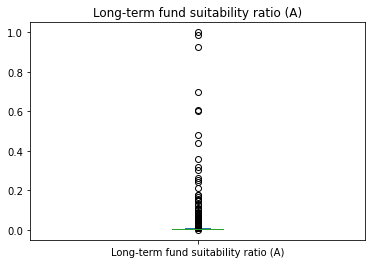

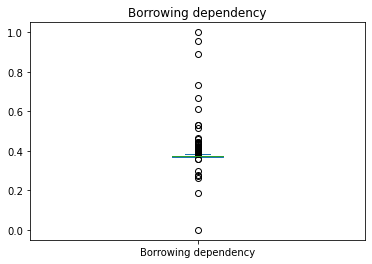

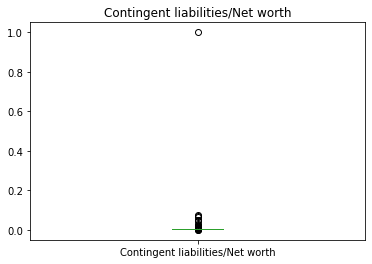

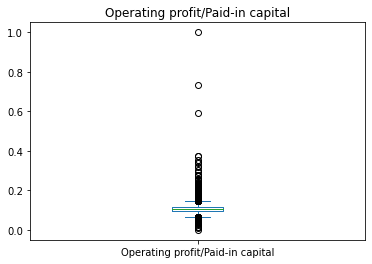

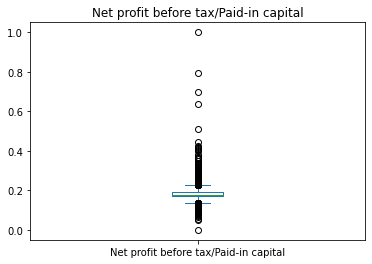

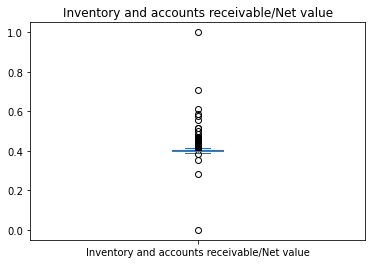

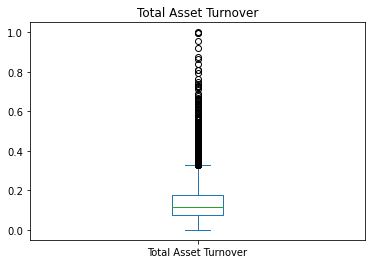

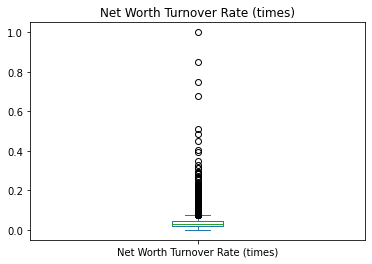

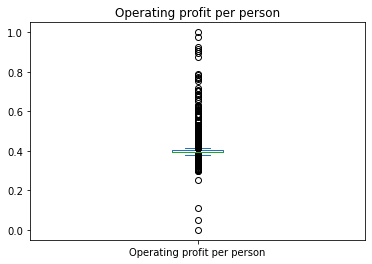

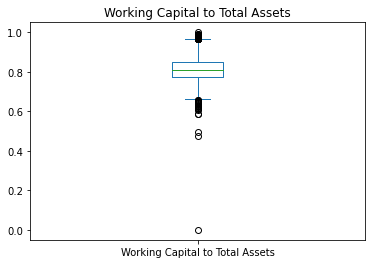

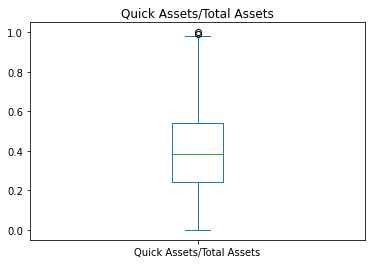

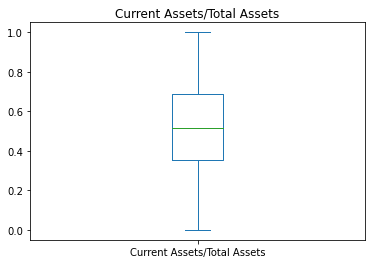

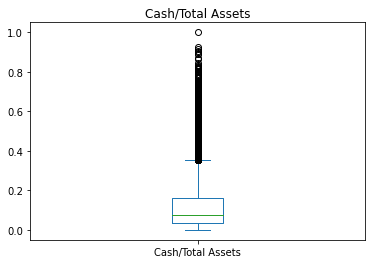

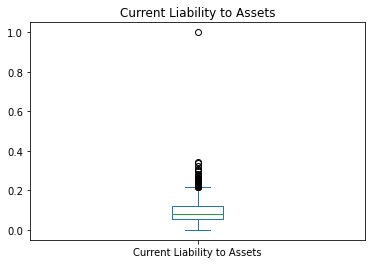

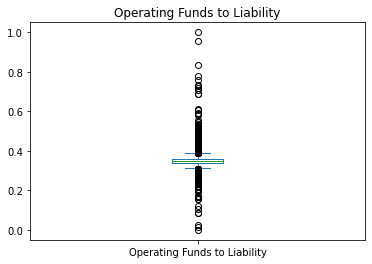

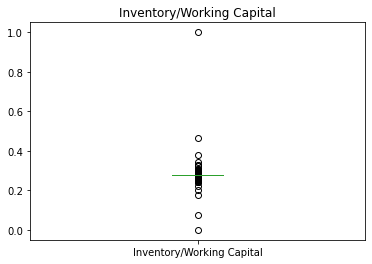

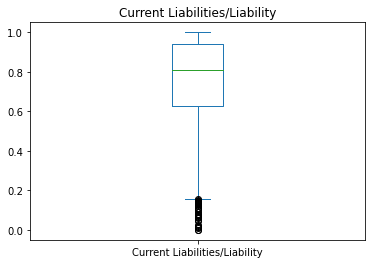

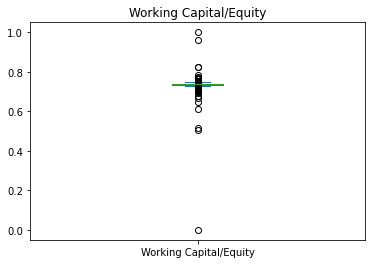

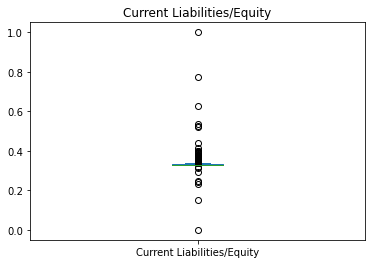

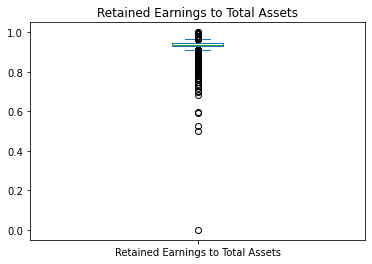

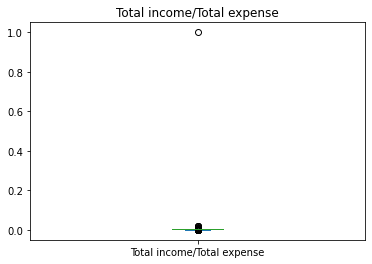

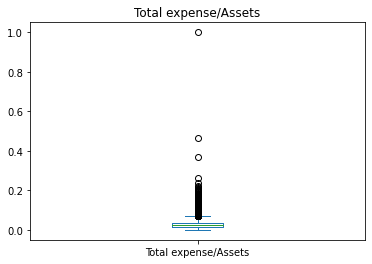

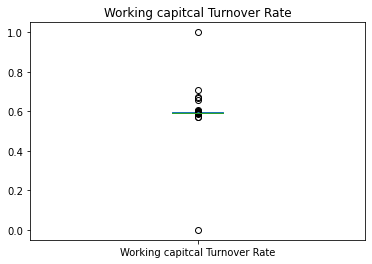

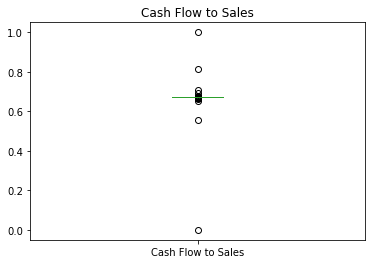

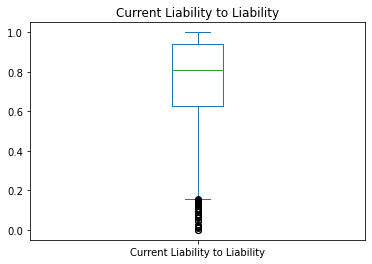

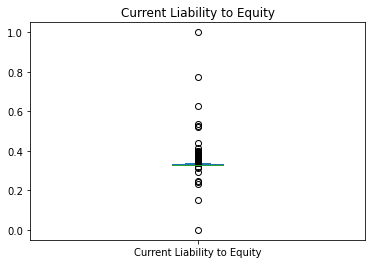

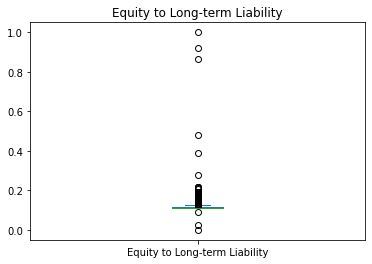

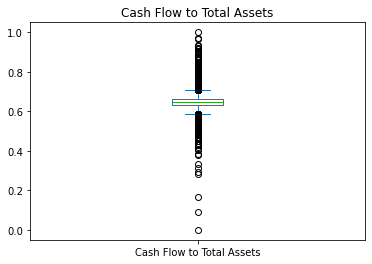

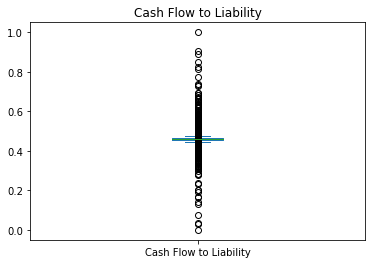

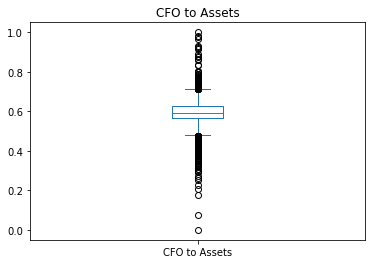

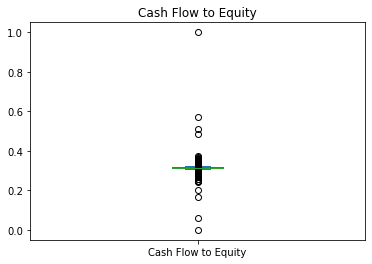

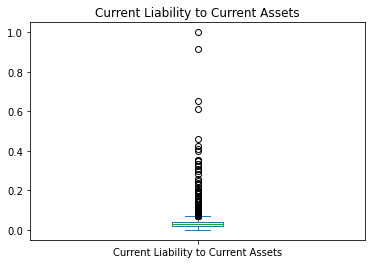

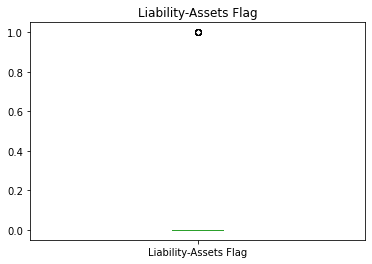

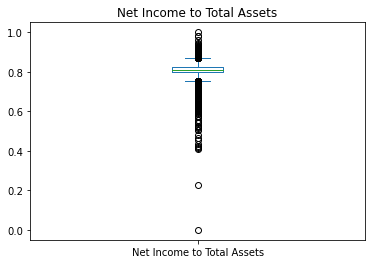

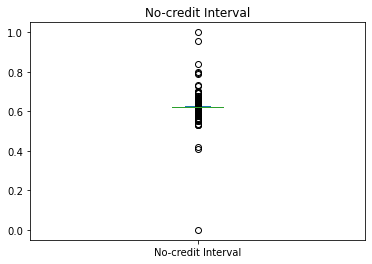

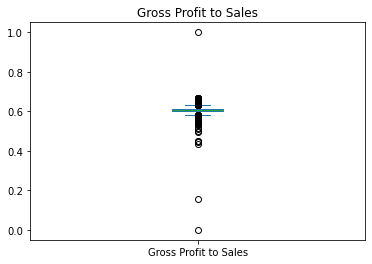

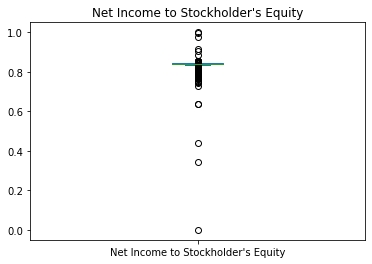

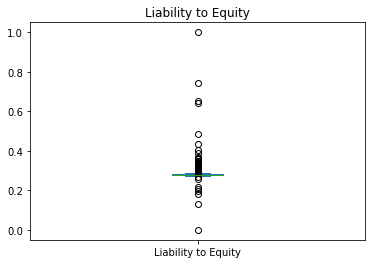

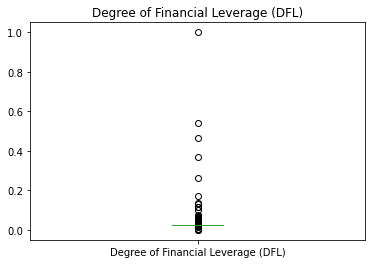

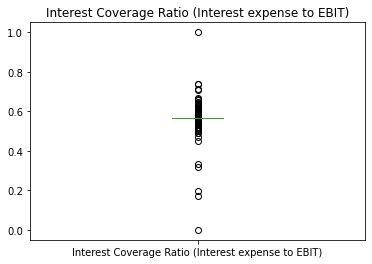

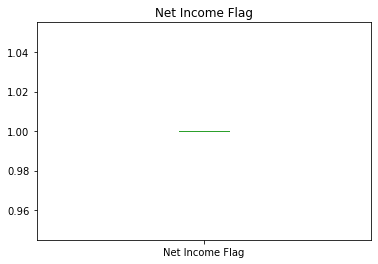

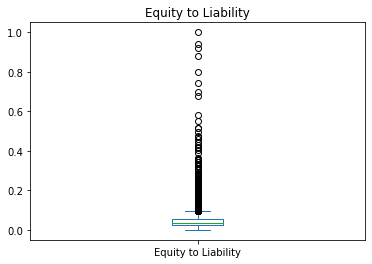

In [21]:
for var in standard:
    data[var].plot(kind='box')
    plt.title(var)
    plt.show()

Les graphiques ont été divisés en deux groupes : les variables normalisées et les variables non normalisées. Cependant, dans les deux cas, ils ne fournissent aucune indication sur la distribution de nos données. La présence d’un trop grand nombre de valeurs aberrantes empêche toute interprétation pertinente. Il est donc impossible de déterminer quelles variables seront significatives.

Nous allons donc directement passer aux tests statistiques.

# Tests statistiques

Sachant que les variables explicatives sont toutes quantitatives, et que la variables à expliquer est qualitative, nous allons effectuer un test de Kruskal-Wallis pour chaque variable.  

In [22]:
import scipy.stats as scipy

In [23]:
var_names = []
kw_test = []
p_value = []

for var in non_standard:
    groups = [data[data['Bankrupt?'] == 0][var], data[data['Bankrupt?'] == 1][var]]
    kw, p = scipy.kruskal(*groups) # * car on peut pas mettre de liste dans l'argument 
    var_names.append(var)
    kw_test.append(kw)
    p_value.append(p)

    
results = pd.DataFrame({'Variables' : var_names,
                        'Kruskal-Wallis' : kw_test,
                        'p_value' : p_value})

results.sort_values(by='p_value', inplace=True)

print(results.shape)
print(results)

(24, 3)
                                Variables  Kruskal-Wallis       p_value
8              Total debt/Total net worth      327.963808  2.668559e-73
5                   Net Value Growth Rate      282.176828  2.519034e-63
7                             Quick Ratio      278.028954  2.018954e-62
6                           Current Ratio      245.209280  2.876733e-55
15         Quick Assets/Current Liability      244.033165  5.191890e-55
16                 Cash/Current Liability      146.834885  8.527588e-34
2     Interest-bearing debt interest rate       91.760418  9.783189e-22
14             Allocation rate per person       58.169533  2.404746e-14
18  Long-term Liability to Current Assets       57.891656  2.769594e-14
4                 Total Asset Growth Rate       50.176779  1.405006e-12
3              Revenue Per Share (Yuan ¥)       38.287473  6.105331e-10
22                 Fixed Assets to Assets       23.386216  1.325248e-06
17            Inventory/Current Liability       21.68120

Un problème est survenu lors du test de Kruskal-Wallis : il est impossible d’effectuer le test sur les variables normalisées, car l’erreur suivante est survenue : "ValueError: All numbers are identical in kruskal". Cela est probablement dû au fait que les valeurs des données sont trop proches.

Par conséquent, pour la suite de notre projet, nous utiliserons uniquement les variables non normalisées afin de réaliser nos tests et construire nos modèles.

In [24]:
results.dtypes

Variables          object
Kruskal-Wallis    float64
p_value           float64
dtype: object

In [25]:
# suppression des p_value > 0.0
results = results[results['p_value'] < 0.05]
results

# results_bis = results[results['p_value'] > 0.05]
# results_bis

,Variables,Kruskal-Wallis,p_value
8,Total debt/Total net worth,327.963808,2.668559e-73
5,Net Value Growth Rate,282.176828,2.519034e-63
7,Quick Ratio,278.028954,2.018954e-62
6,Current Ratio,245.209280,2.876733e-55
15,Quick Assets/Current Liability,244.033165,5.191890e-55
16,Cash/Current Liability,146.834885,8.527588e-34
2,Interest-bearing debt interest rate,91.760418,9.783189e-22
14,Allocation rate per person,58.169533,2.404746e-14
18,Long-term Liability to Current Assets,57.891656,2.769594e-14
4,Total Asset Growth Rate,50.176779,1.405006e-12


In [26]:
results.shape

(19, 3)

Nous éliminons les variables avec un une p-valeur < 0.05. Cinq variables ont été éliminé, il ne reste plus que 19 variables pour la création des modèles. 

# Modèles 

Pour la création des modèles, nous débutons par la régression logistique, l’un des modèles les plus simples. Après avoir défini les variables explicatives et la variable à expliquer, nous divisons le jeu de données en deux parties : une pour l'entraînement (train) et une autre pour le test.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X = data[non_standard]
X

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
0,1.256969e-04,0.000000e+00,7.250725e-04,0.017560,4.980000e+09,0.000327,0.002259,0.001208,0.021266,0.001814,0.003487,1.820926e-04,1.165007e-04,0.034164,0.037135,0.001997,1.473360e-04,0.001036,2.559237e-02,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.009219
1,2.897851e-04,0.000000e+00,6.470647e-04,0.021144,6.110000e+09,0.000443,0.006016,0.004039,0.012502,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.012335,0.004136,1.383910e-03,0.005210,2.394682e-02,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.008323
2,2.361297e-04,2.550000e+07,7.900790e-04,0.005944,7.280000e+09,0.000396,0.011543,0.005348,0.021248,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.141016,0.006302,5.340000e+09,0.013879,3.715116e-03,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.040003
3,1.078888e-04,0.000000e+00,4.490449e-04,0.014368,4.880000e+09,0.000382,0.004194,0.002896,0.009572,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.021320,0.002961,1.010646e-03,0.003540,2.216520e-02,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.003252
4,7.890000e+09,0.000000e+00,6.860686e-04,0.029690,5.510000e+09,0.000439,0.006022,0.003727,0.005150,0.001449,0.004367,1.633674e-04,2.935211e-04,0.058111,0.023988,0.004275,6.804636e-04,0.004869,0.000000e+00,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.003878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.510213e-04,4.500000e+09,1.790179e-04,0.020766,7.070000e+09,0.000450,0.010451,0.005457,0.006655,0.000690,0.009177,4.030000e+07,1.429781e-04,0.006348,0.006312,0.005469,5.071548e-03,0.013212,1.792237e-03,2.294154e-04,1.244230e-04,1.077940e-04,0.400338,0.000466
6815,5.220000e+09,1.440000e+09,2.370237e-04,0.023050,5.220000e+09,0.000445,0.009259,0.006741,0.004623,0.000655,0.009652,9.940000e+09,6.051982e-04,0.016083,0.003401,0.006790,4.727181e-03,0.006730,2.204673e-03,1.517299e-04,1.173396e-04,7.710000e+09,0.096136,0.001959
6816,2.509312e-04,1.039086e-04,0.000000e+00,0.044255,5.990000e+09,0.000435,0.038424,0.035112,0.001392,0.001510,0.004188,2.797309e-04,1.024298e-03,0.022097,0.002774,0.035531,8.821248e-02,0.007810,0.000000e+00,1.762272e-04,1.749713e-04,4.074263e-04,0.055509,0.002840
6817,1.236154e-04,2.510000e+09,2.110211e-04,0.031535,7.250000e+09,0.000529,0.012782,0.007256,0.003816,0.000716,0.008829,4.550000e+09,2.330013e-04,0.012749,0.007489,0.007753,7.133218e-03,0.013334,3.200000e+09,2.135940e-04,1.351937e-04,1.165392e-04,0.246805,0.002837


In [29]:
y = data['Bankrupt?']
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
model = LogisticRegression(random_state=0)

In [32]:
model.fit(X_train, y_train)

C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [33]:
# essayons sans la normalisation des données 

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

La création d’un classification report et d’une matrice de confusion permet d’interpréter les performances de notre modèle. Quant à la courbe ROC, elle offre une visualisation de la capacité du modèle à distinguer les classes.

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9530791788856305
Confusion Matrix:
[[1300   18]
 [  46    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



Malgré une accuracy globale de 95 %, la matrice de confusion révèle que le modèle est inefficace. En effet, il affiche 1 300 vrais négatifs (VN) et seulement 18 faux positifs (FP), ce qui semble acceptable. Cependant, le véritable problème réside dans l'absence totale de vrais positifs (VP) et la présence de 46 faux négatifs (FN). Autrement dit, lorsque qu’une entreprise fait faillite, le modèle est incapable de le prédire.

Cela se confirme également dans le classification report, où la précision et le rappel pour la classe 1 sont de 0 %, puisque le nombre de VP est nul.

Ce résultat rend le modèle particulièrement inefficace. Si l’objectif est d’anticiper la faillite d’une entreprise, le modèle prédit systématiquement "non", même lorsque l’entreprise est réellement en faillite.

### Rappel des métriques d'un classification report

Vrai négatif : le modèle prédit négatif et c'est vrai 

Vrai positif : le modèle prédit positif et c'est vrai 

Faux positif : le modèle prédit positif MAIS c'est faux

Faux négatif : le modèle prédit négatif MAIS c'est faux


Précision : le nombre de positif que le modèle a bien prédit parmi tous les positifs que LE MODELE a prédit comme positif 

Précision = VP / VP + FP


Recall : le nombre de positif que le modèle a bien prédit parmi tous les positifs de notre jeu de données 

Recall : VP / VP + FN


F1 score : c'est un compromis entre les 2

Support : le support correspond au nombre total d'exemples réels de chaque classe dans le jeu de données.

C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

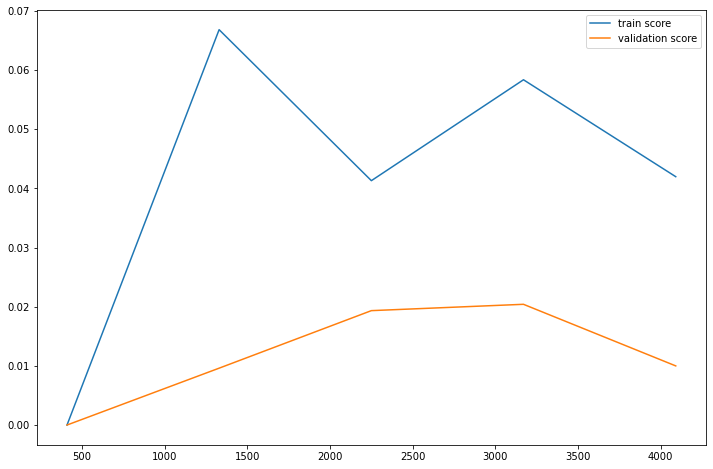

In [37]:
from sklearn.model_selection import learning_curve


# learning curve fait une validation croisée en fonction de la taille de l'échantillon, permet de savoir si il y a 
# overfitting ou underfitting, MAIS ne prend pas comme argument X_test et y_test car ça on ne les utilise qu'à la fin
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          cv=4, scoring='f1')

# on fait mean car on a une validation croisée 
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, val_score.mean(axis=1), label = 'validation score')
plt.legend()

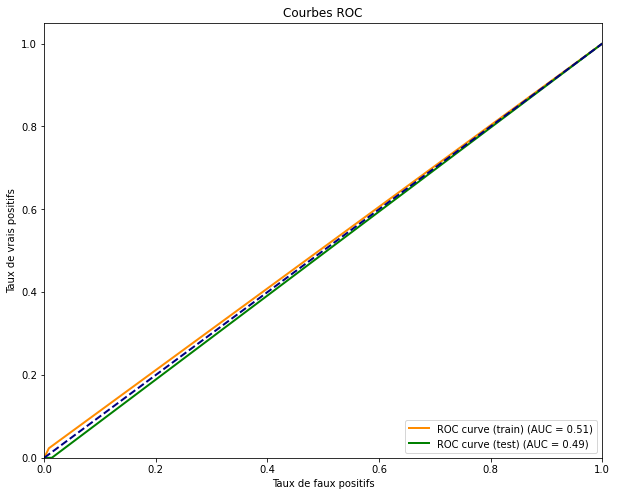

In [38]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

La courbe d’apprentissage (learning curve) et la courbe ROC confirment notre interprétation selon laquelle le modèle est très mauvais. Pour la courbe ROC, nous obtenons une AUC (aire sous la courbe) de 0,49 sur le jeu de test, ce qui signifie que même le hasard ferait mieux.

## Normalisions nos données 

L'un des problèmes de notre modèle est probablement lié au fait que nos données ne sont pas normalisées, ce qui peut amener certaines variables à dominer d'autres et biaiser le modèle. Nous allons donc normaliser toutes nos variables et effectuer à nouveau une régression logistique.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [40]:
reglog_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

In [41]:
reglog_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [42]:
y_pred_stand = reglog_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



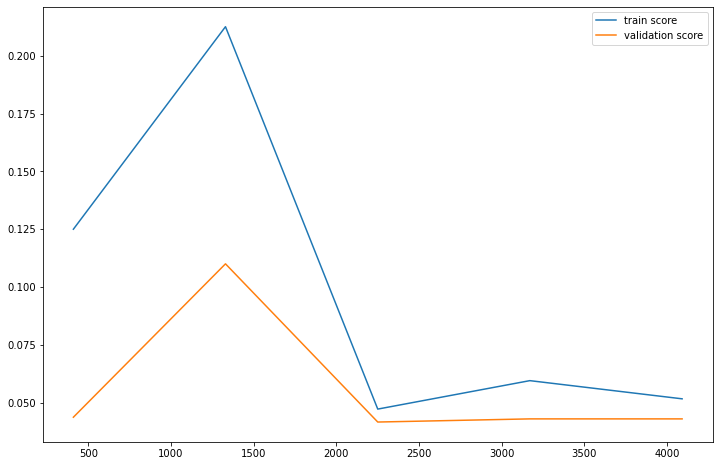

In [44]:
from sklearn.model_selection import learning_curve


# learning curve fait une validation croisée en fonction de la taille de l'échantillon, permet de savoir si il y a 
# overfitting ou underfitting, MAIS ne prend pas comme argument X_test et y_test car ça on ne les utilise qu'à la fin
N, train_score, val_score = learning_curve(reglog_model, X_train, y_train,
                                          cv=4, scoring='f1')

# on fait mean car on a une validation croisée 
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, val_score.mean(axis=1), label = 'validation score')
plt.legend()

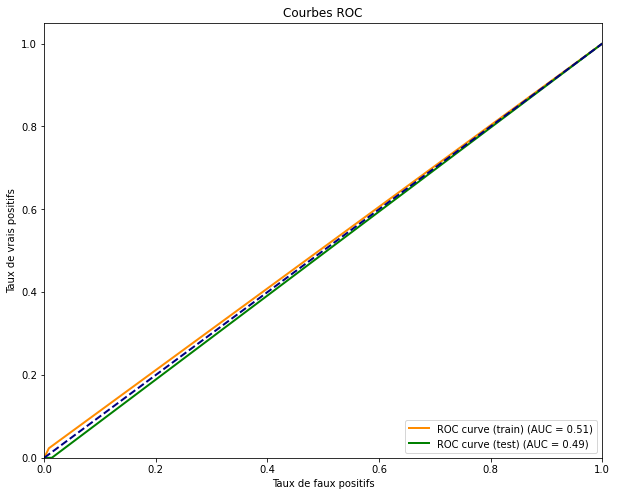

In [45]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

Malheureusement, ce n'est pas mieux, l'AUC pour le train set est toujours de 0,49, autrement dit le hasard fait encore une fois un meilleur travail. 

# Autres modèles 

Vu que la régression logistique donne de très mauvais résultat, nous allons effectuer d'autres modèles, à savoir : un adaboost, une forêt aléatoire et un SVM. 

En ce qui concerne le SVM, les données vont être normalisées car cela est néceessaire. Mais, sinon l'interprétation de nos modèles est la même que pour la régression logistique. 

In [46]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [47]:
Adaboost = AdaBoostClassifier(random_state=0)
Randomforest = RandomForestClassifier(random_state=0)
SVM = make_pipeline(StandardScaler(), SVC(random_state=0))

In [48]:
list_of_models = {'Adaboost' : Adaboost,
                  'Random_forest' : Randomforest,
                  'SVM' : SVM}

In [49]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1')
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'validation score')
    plt.legend()

Adaboost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.54      0.28      0.37        46

    accuracy                           0.97      1364
   macro avg       0.76      0.64      0.68      1364
weighted avg       0.96      0.97      0.96      1364

Random_forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.40      0.04      0.08        46

    accuracy                           0.97      1364
   macro avg       0.68      0.52      0.53      1364
weighted avg       0.95      0.97      0.95      1364

SVM


C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nesho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



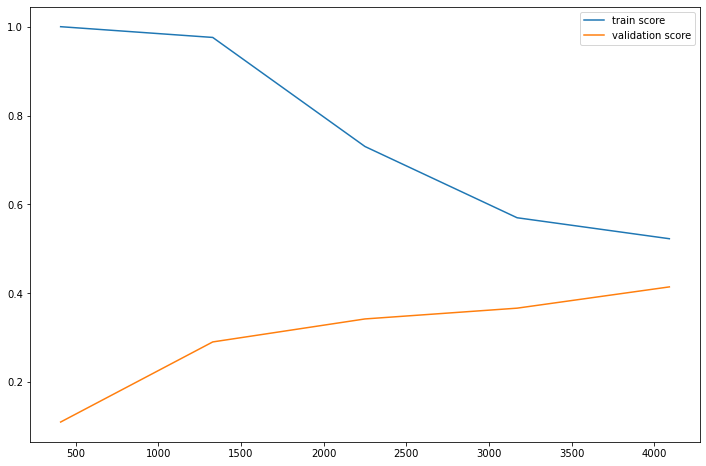

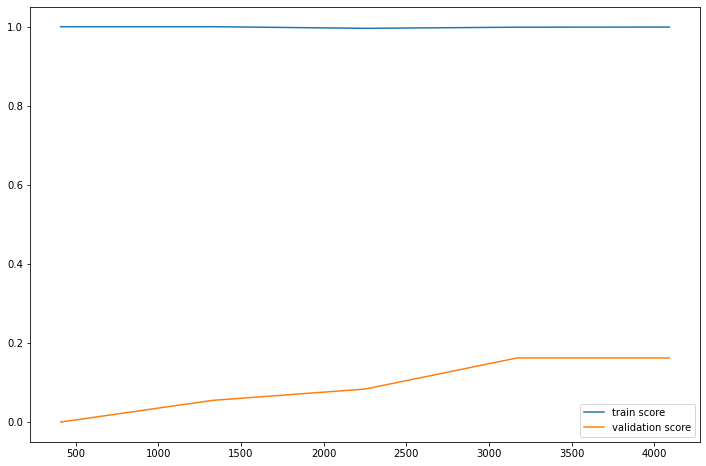

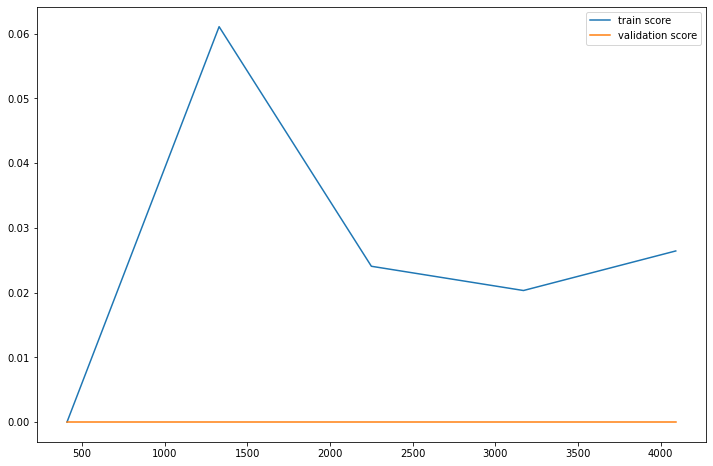

In [50]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

Le pire des trois modèles est la forêt aléatoire, car elle présente un overfitting important. En ce qui concerne le SVM, les performances du modèle sont plutôt médiocres.

Enfin, l'Adaboost est le meilleur modèle, car il ne présente pas d'overfitting et est le plus performant, avec une précision globale de 40 %.

De plus, si nous nous intéressons à la classification, le nombre de VP n'est pas nul, contrairement à l'arbre de décision. Le F1-score (qui est un compromis entre la précision et le rappel) pour la classe 1 est de 0,37, ce qui n'est pas si mauvais.

# Optimisation du adaboost

Pour optimiser l'adaboost, nous allons effectuer un grid_search. 

In [51]:
Adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 0}

Le grid_search est une méthode qui permet d'optimiser un modèle en fixant dès le départ un liste d'hyperparamètres à tester. Pour un adaboost, les hyperparamètres les plus importants sont : 
- n_estimators (nombre d'arbres à construitre) 
- learning_rate autrement dit le taux d'apprentissage qui détermine la contribution de chaque arbre. 

Pour le reste la création du modèle et l'interprétation des résultats est pareil qu'avant. 

In [52]:
from sklearn.model_selection import GridSearchCV

params_adaboost = {'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
                   'n_estimators' : [20, 50, 100, 1000]}

grid_search = GridSearchCV(estimator=Adaboost, param_grid=params_adaboost, 
                           cv=4, scoring='f1')

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

Nous remarquons que les meilleurs paramètres sont les paramètres de base, ce qui signifie que l'Adaboost obtenu auparavant est le meilleur Adaboost que l'on puisse obtenir. Vérifions cela en utilisant le classification report et la learning curve.

In [53]:
grid_search.get_params() # le scoring par défaut est l'accuracy 

{'cv': 4,
 'error_score': nan,
 'estimator__algorithm': 'SAMME.R',
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__n_estimators': 50,
 'estimator__random_state': 0,
 'estimator': AdaBoostClassifier(random_state=0),
 'n_jobs': None,
 'param_grid': {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
  'n_estimators': [20, 50, 100, 1000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1',
 'verbose': 0}

In [54]:
best_model = grid_search.best_estimator_
best_model

AdaBoostClassifier(learning_rate=1, random_state=0)

In [55]:
y_pred_adaboost = best_model.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.54      0.28      0.37        46

    accuracy                           0.97      1364
   macro avg       0.76      0.64      0.68      1364
weighted avg       0.96      0.97      0.96      1364



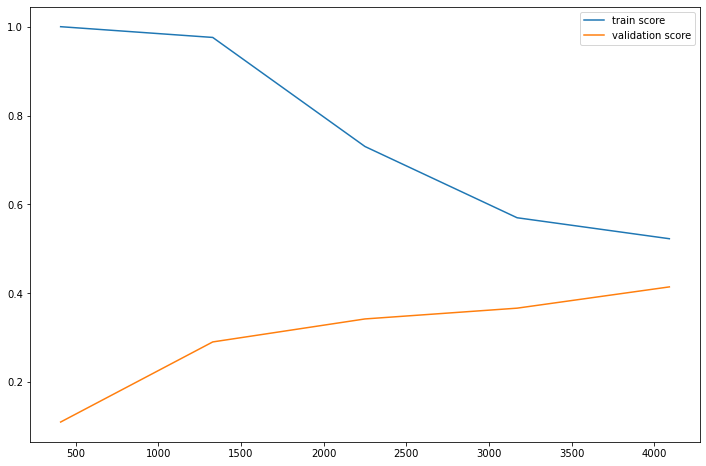

In [57]:
N, train_score, val_score = learning_curve(best_model, X_train, y_train,
                                           cv=4, scoring='f1')
    
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, val_score.mean(axis=1), label = 'validation score')
plt.legend()

Nous obtenons en effet les mêmes résultats que le précédent modèle. Ainsi, il n'est pas possible d'améliorer notre Adaboost. 

# Modéle XGBoost

In [58]:
from xgboost import XGBClassifier
# il y a 2 facçons d'utilsier XGB

Nous allons directement passer à l'interprétation des résultats, car l'implémentation des modèles se fait de la même manière que pour les précédents. Enfin, l'optimisation de ces deux modèles s'effectue également avec un grid search, il n'est donc pas nécessaire de passer plus de temps là-dessus.

Les modèles XGBoost sont généralement parmi les plus performants en raison de leur puissance. C’est pourquoi nous consacrons davantage de temps à ce type de modèle.

In [60]:
XGB3 = XGBClassifier(random_state=0)

In [61]:
model3 = XGB3.fit(X_train, y_train)

In [62]:
ypred3 = model3.predict(X_test)

In [63]:
print('XGB1')
print(classification_report(y_test, ypred3))

XGB1
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.58      0.24      0.34        46

    accuracy                           0.97      1364
   macro avg       0.78      0.62      0.66      1364
weighted avg       0.96      0.97      0.96      1364



[ 409 1329 2250 3170 4091]


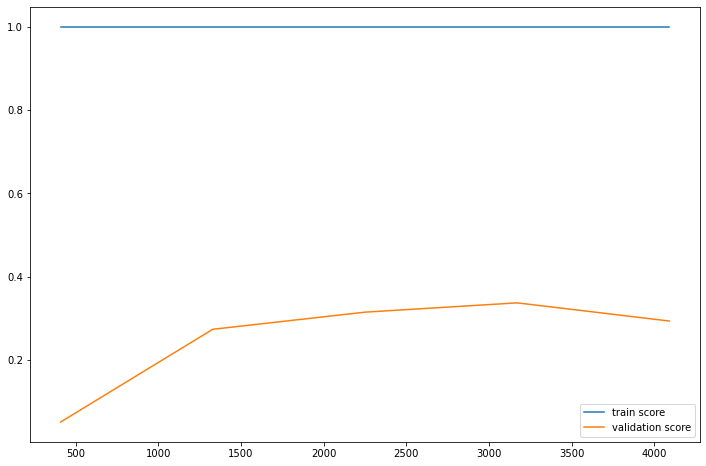

In [64]:
N, train_score, val_score = learning_curve(XGB3, X_train, y_train,
                                           cv=4, scoring='f1')

print(N)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, val_score.mean(axis=1), label = 'validation score')
plt.legend()

In [65]:
# learning_curve?
# les paramètre N, train_score et val_score ont choisi 5 observations mais pas de manières aléatoires par exmeple ici il y 4000
# observations donc 10% du total = 400, 32.5% = 1300, ... 
# on peut choisir des données de manière aléatoire en utilisant l'argument shuffle
# enfin on peut choisir les observations que l'on veut avec l'argument train_size

Même si nous obtenons avec le XGBoost, sans optimisation, de meilleurs résultats que l'Adaboost optimisé, avec un meilleur rappel, une meilleure précision et un meilleur F1-score, nous observons sur le graphique un important overfitting, ce qui rend le modèle mauvais.

# Optimisation 

In [66]:
XGB_model = XGBClassifier(random_state=0)

params_grid = {
    "objective": ["multi:softmax"],  # Classification multi-classes
    "num_class" : [2],
    "reg_alpha" : [0.0, 1.0, 10.0, 15.0, 50.0],  # L1 regularization (Lasso)
    "reg_lambda" : [0.0, 1.0, 10.0, 50.0],  # L2 regularization (Ridge)
    "max_depth": [2, 3, 4, 5],  # Profondeur maximale des arbres
    "eta": [0.01, 0.1, 0.3, 1],  # Taux d'apprentissage
    "eval_metric": ["logloss"]  # Log-loss pour multi-classes
}
# faire attention à bien mettre des listes, vu que pour certains éléments j'ai mis des listes il faut en mettre pour tous les 
# parmètres 

grid_search_xgb = GridSearchCV(estimator=XGB_model, param_grid=params_grid, cv=4)

grid_search_xgb.fit(X_train, y_train)

grid_search_xgb.best_params_

{'eta': 0.3,
 'eval_metric': 'logloss',
 'max_depth': 4,
 'num_class': 2,
 'objective': 'multi:softmax',
 'reg_alpha': 15.0,
 'reg_lambda': 10.0}

In [67]:
# pénalité lasso + ridge = elastic net, on aurait direct pu mettre lel param elastic net au lieu des 2 params 

In [68]:
best_model_xgb = grid_search_xgb.best_estimator_

In [69]:
y_pred_xgb2 = best_model_xgb.predict(X_test)

In [70]:
print('XBG1 optimisé')
print(classification_report(y_test, y_pred_xgb2))

XBG1 optimisé
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.63      0.26      0.37        46

    accuracy                           0.97      1364
   macro avg       0.80      0.63      0.68      1364
weighted avg       0.96      0.97      0.96      1364



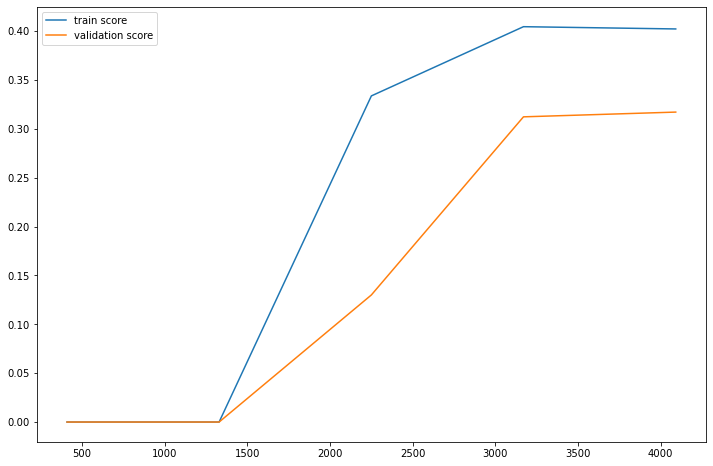

In [71]:
N, train_score, val_score = learning_curve(best_model_xgb, X_train, y_train,
                                           cv=4, scoring='f1')
    
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, val_score.mean(axis=1), label = 'validation score')
plt.legend()

Nous obtenons encore de meilleurs résultats avec : une précision pour la classe 1 de 63 %, un rappel de 26 % et un F1-score de 37 %. De plus, ce modèle présente beaucoup moins d'overfitting. Nous remarquons également que, pour de grandes quantités de données, la différence entre le F1-score du train set et celui du test set est réduite, ce qui est une bonne chose.

Néanmoins, malgré de meilleurs résultats, nous décidons de conserver l'Adaboost optimisé, car il ne présente aucun overfitting. De plus, la différence se limite à la précision, ce qui n'est pas énorme.

Le modèle conservé est donc l'Adaboost.

(il y a avait aussi un autre modèle xgb avec une autre bibliothèque mais c'etait plus compliqué à interpréter)